# CS 109A/STAT 121A/AC 209A/CSCI E-109A: Homework 2
# Linear and k-NN Regression


**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- Do not include your name(s) in the notebook even if you are submitting as a group. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

---

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

# Predicting Taxi Pickups in NYC

In this homework, we will explore k-nearest neighbor, linear and polynomial regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in files `dataset_1_train.txt` and `dataset_1_test.txt` as separate training and test sets. The first column in each file contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded during different days in Jan 2015 (randomly sampled across days and time of that day).

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pick ups at that time. The models will be fitted to the training set, and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric. 

**Data Normalization:** As a first step, we suggest that you normalize the `TimeMin` predictor to a value between 0 and 1. This can be done by dividing the time column in the training and test sets by 1440 (i.e. the maximum value the predictor can take). This normalization step would be particularly helpful while fitting polynomial regression models on this data.

# Part (0): EDA

Generate a scatter plot of the training data points, with the time of the day on the X-axis and the number of taxi pickups on the Y-axis. Does the pattern of taxi pickups make intuitive sense to you?

<font color = 'green'> Read the training data into nyc_cab_df dataframe and normalize the TimeMin column (do the same with the training set)

In [2]:
nyc_cab_df = pd.read_csv('dataset_1_train.txt', low_memory=False)
test = pd.read_csv('dataset_1_test.txt',low_memory = False)
nyc_cab_df['TimeMin'] = nyc_cab_df['TimeMin']/1440
test['TimeMin'] = test['TimeMin']/1440

<font color = 'green'>It makes sense that the pickup count on either end (close to 0 and 1) is high since there should be a lot of traffic moving into and out of the city as people commute in and out of work

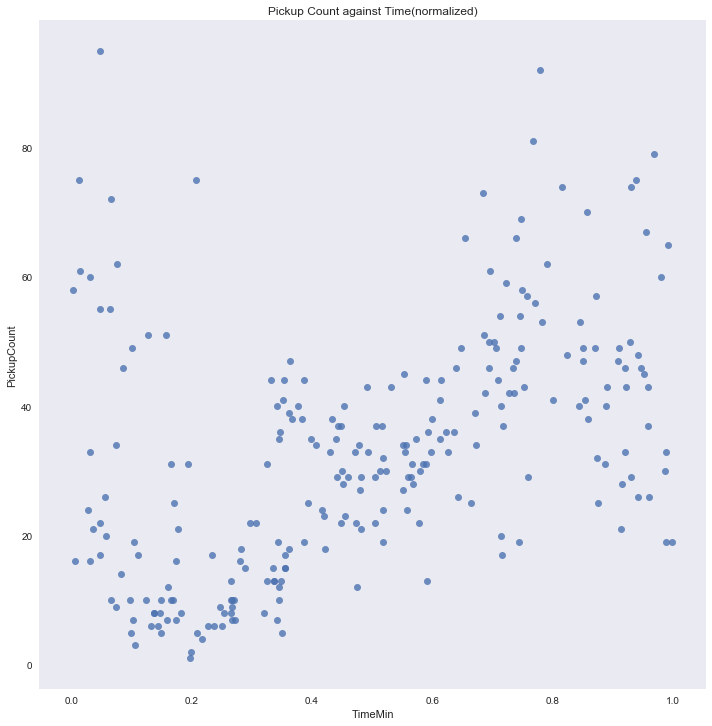

In [3]:
plt.figure()
sns.lmplot("TimeMin", "PickupCount", data=nyc_cab_df, fit_reg=False,size = 10)
plt.title('Pickup Count against Time(normalized)')
plt.grid(False)

# Part (a): k-Nearest Neighbors

We begin with k-Nearest Neighbors (k-NN), a non-parametric regression technique. You may use `sklearn`'s built-in functions to run k-NN regression. Create a `KNeighborsRegressor` object, use the `fit` method in the object to fit a k-NN regressor model, use the `predict` method to make predictions from the model, and the `score` method to evaluate the $R^2$ score of the model on a data set.

- Fit k-NN regression models:
    - Fit a k-NN regression model to the training set for different values of $k$ (e.g. you may try out values 1, 2, 10, 25, 50, 100 and 200). 
    - If you are using `sklearn`'s built-in functions for k-NN regression, explain what happens when you invoke the `fit` function. 
    - If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?
- Visualize the fitted models: 
    - Generate a scatter plot of the training data points, and in the same figure, also generate line plots of the predicted values $\hat{y}$ from each fitted model as a function of the predictor variable $x$. (*Hint:* you will want to sort the $x$ values before plotting.)
    - How does the value of $k$ effect the fitted model?
- Evaluate the fitted models:
    - Compute the $R^2$ score for the fitted models on both the training and test sets. Are some of the calculated $R^2$ values negative? If so, what does this indicate? What does a $R^2$ score of 0 mean?
    - Make plots of the training and test $R^2$ values as a function of $k$. Do the training and test $R^2$ plots exhibit different trends? Explain how the value of $k$ influences the training and test $R^2$ values.

# Fitting k-NN

<font color = 'green'> 1 a) Fit k-NN regression models

In [4]:
# K-NN Method/ obtain columns
X_train = nyc_cab_df[['TimeMin']].values
y_train = nyc_cab_df['PickupCount'].values
X_test = test[['TimeMin']].values
y_test = test['PickupCount'].values


<font color = 'green'> 1 b) When you invoke the fit function k-NN will run through each x data point you have and determine the average of the k nearest datapoints for each x value. It will then save this result as an object so whenever you want to 'predict' values of y you can call the object and predict on a set of x values

In [5]:
# create array for models and store them
models = []
kvals = [1,2,10,25,50,100,200]
for i in range(len(kvals)):
    models.append(KNeighborsRegressor(n_neighbors=kvals[i]).fit(X_train,y_train))


<font color = 'green'> 1 c) If k = n, we simply take the average of every data point at each step which means for every prediction we will predict the same value (the average)

# Visualization

In the figures below I plot the k-nn prediction of the training set!

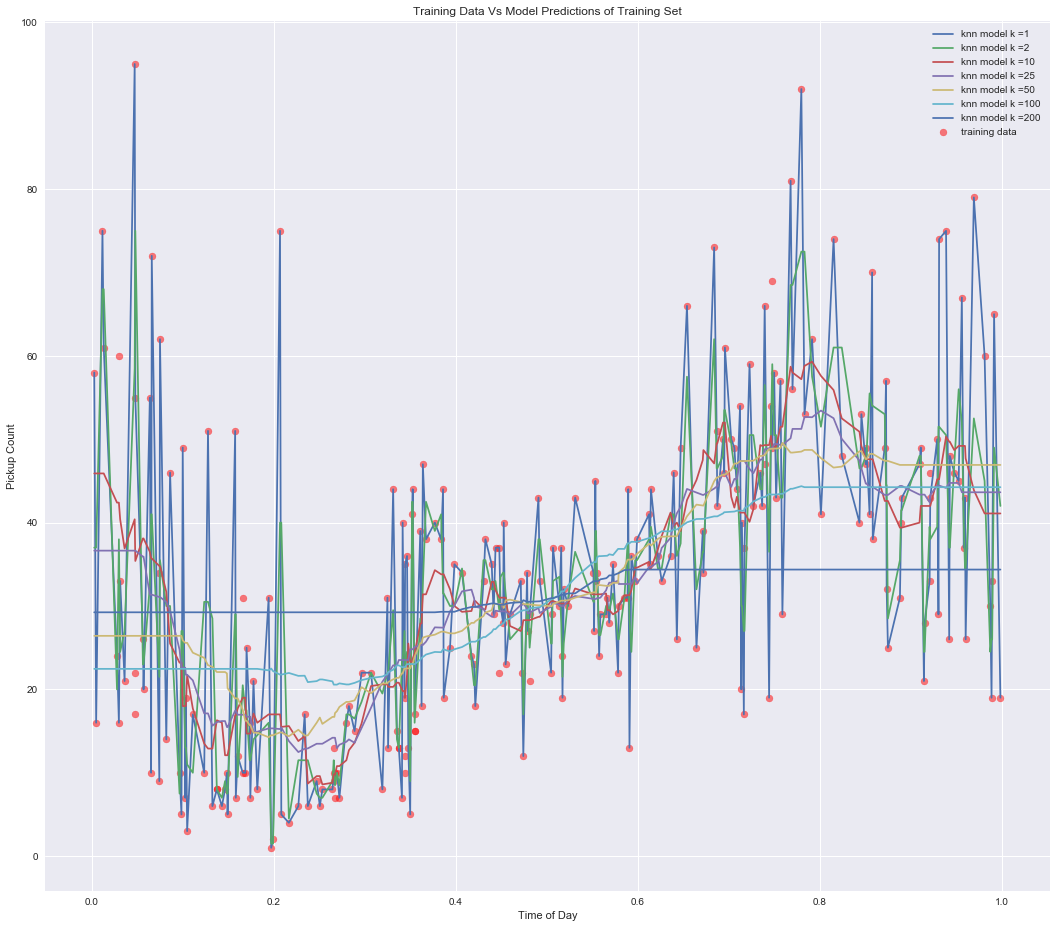

In [6]:
# for each model plot the prediction of the training data
plt.figure(figsize = (18,16),facecolor = 'white',edgecolor = 'white')
xx = np.sort(X_train[:,0])
for i in range(len(models)):
    plt.plot(xx, models[i].predict(xx.reshape(-1,1)), alpha=1, label='knn model k ='+ str(kvals[i]))

plt.scatter(X_train, y_train, color='red', alpha=0.5, label='training data')
plt.xlabel('Time of Day')
plt.ylabel('Pickup Count')
plt.title('Training Data Vs Model Predictions of Training Set')
plt.legend(loc='best')




<font color = 'green'> In the figure below I plot the training data/prediction separately for each value of k

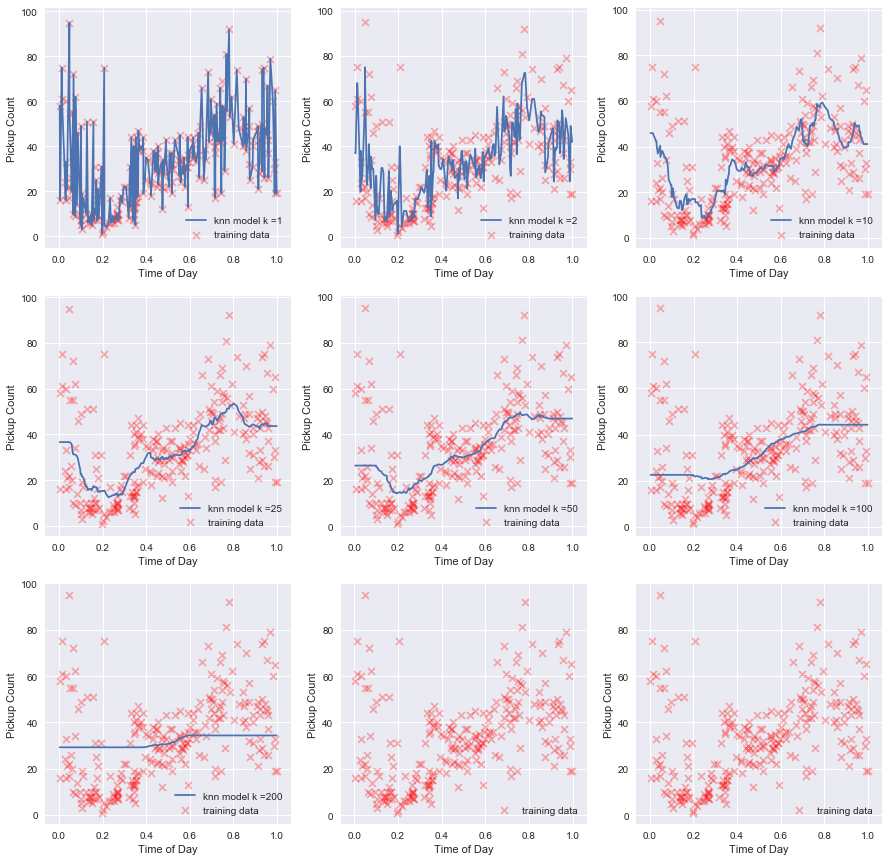

In [7]:
# for each model plot the prediction of the training data
fig, ax = plt.subplots(3,3,figsize = (15,15))
xx = np.sort(X_train[:,0])
ctr = 0
for i in range(3):
    for j in range(3):
        if ctr < 7:
            ax[i,j].plot(xx, models[ctr].predict(xx.reshape(-1,1)), alpha=1, label='knn model k ='+ str(kvals[ctr]))
        ax[i,j].scatter(X_train, y_train, color='red', alpha=0.3, label='training data',marker = 'x')
        ax[i,j].set_xlabel('Time of Day')
        ax[i,j].set_ylabel('Pickup Count')
        ax[i,j].legend()
        ctr+=1
ax[2,2].plot
plt.legend(loc='best')




<font color = 'green'> 2 b) We can see from the figures above that as we increase the value of k we become less accurate with our training set but are able to generalize the overall trend by k = 50. However, as k increases beyond this point, the model starts to underfit and we face a scenario where not much info is being capture by the data at hand

# Evaluating Models

<font color = 'green'> In the figure below we show the R^2 of the training and the test

In [8]:
rtrain = []
rtest = []

for i in range(len(models)):
    rtrain.append(models[i].score(X_train,y_train))
    rtest.append(models[i].score(X_test,y_test))

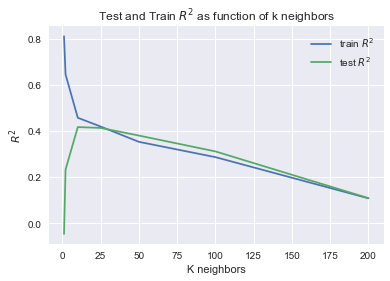

In [9]:
plt.figure()
plt.plot(kvals,rtrain,label = 'train $R^2$')
plt.plot(kvals,rtest,label = 'test $R^2$')
plt.legend()
plt.title('Test and Train $R^2$ as function of k neighbors')
plt.xlabel('K neighbors')
plt.ylabel('$R^2$')

<font color = 'green'> 3 a) The test R^2 starts off being negative meaning we are simply doing a very bad job by setting k = 1 (essentially the fitted line is worse than an average fit on the test set). If $R^2$ is zero then there is no correlation between the two variables

3 b) As k gets larger our test score improves and our training score worsens as we overcome a high variance situation. Then, beyond k = 15, the test score begins to worsen and the training score also reduces significantly. In this latter half, we experience high bias as both the training and test score are poor

# Part (b): Simple Linear Regression

We next consider parametric approaches for regression, starting with simple linear regression, which assumes that the response variable has a linear relationship with the predictor. Do you see any advantages in using a parametric regression model over k-NN regression?

We suggest that you use the `statsmodels` module for linear regression. This module has built-in functions to summarize the results of regression, and to compute confidence intervals for estimated regression parameters. Create a `OLS` class instance, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. To include an intercept term in the regression model, you will need to append a column of 1's to the array of predictors using the `sm.add_constant` method. The `fit` method returns a `results` instance. Use the  `results.summary` method to obtain a summary of the regression fit, the `results.params` attribute to get the estimated regression parameters, and the `conf_int` method to compute confidence intervals for the estimated parameters. You may use the `r2_score` function to compute $R^2$.

Using the suggested built-in functions, answer the following questions:

- Fit a linear regression model to the training set, and evaluate its $R^2$ value on both the training and test sets (you may notice something peculiar about how they compare). 
- How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression in Part (a)?

- Compute confidence intervals:
    - Print the slope and intercept values for the fitted linear model. What does the sign of the slope convey about the data?
    - Compute the 95% confidence interval for the slope and intercept. Based on this information, do you consider the estimates of the model parameters to be reliable?
    - Do you expect a 99% confidence interval for the slope and intercept to be tighter or looser than the 95% confidence intervals? Briefly explain your answer.

- Analyze residual plots:
    - Make a plot of the residuals ${e} = y - \hat{y}$ of the model on the training set as a function of the predictor variable $x$ (i.e. time of day). Draw a horizontal line denoting the zero residual value on the Y-axis.
    - Using this residual plot, comment on whether the assumption of linearity is valid for this data.

# Fitting

<font color = 'green'> a) We notice from the printed statements below that the test score is higher than the training score.

b) The best test score with k-NN is 0.4 while the test score in this model is only 0.24 so k-NN for k = 15 is better than this model.

c) The sign of the slope tells us whether we are positively correlated or negatively ( in this case we see that the model predicts positive correlation)

d) The confidence interval is quite wide meaning the estimates could be at any end of the spectrum in the 95% interval, so while we obtained 18 for the intercept, it may even be 13 which suggests that there is significant uncertainty.

e) The 99% interval is an attempt to gurantee that the mean of the data is within the given bounds and since 99 is greater than 95 we expect the bounds to be wider essentially we are looking at 3sigma instead of 2sigma.


In [10]:
X = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
linreg = sm.OLS(y_train, X)
results = linreg.fit()
#print(results.rsquared)
print('R^2 on training set = %s' %r2_score(y_train,results.predict(X)))
print('')
print('R^2 on test set = %s' %r2_score(y_test,results.predict(X_test)))
print('')
print('[beta_0, beta_1] = %s' %results.params)
print('')
print('95% confidence interval =' + str(results.conf_int(alpha = 0.05)))
print('')
print('99% confidence interval =' +str(results.conf_int(alpha = 0.01)))

R^2 on training set = 0.207213752099

R^2 on test set = 0.247712329948

[beta_0, beta_1] = [ 18.02638518  30.28902299]

95% confidence interval =[[ 13.84986472  22.20290563]
 [ 22.879319    37.69872697]]

99% confidence interval =[[ 12.52194788  23.53082247]
 [ 20.52341753  40.05462845]]


# Residuals

<font color = 'green'> The residuals below show that only a linear model in the center makes sense. Outside of this central region we see the residuals are much larger meaning a linear fit isn't the right model

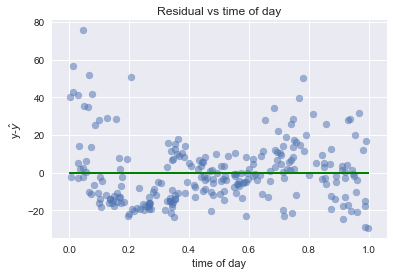

In [11]:
plt.figure()
plt.title('Residual vs time of day')
plt.scatter(X_train, y_train - results.predict(X),alpha = 0.5)
plt.plot(X_train,np.zeros(len(X_train)),color = 'green')
plt.xlabel('time of day')
plt.ylabel('y-$\hat{y}$')

# Part (c): Polynomial Regression

We proceed to higher-order polynomial models for regression:

- By visual inspection, what polynomial degree do you think would provide the best fit for the data?

- At the start of this assignment, we had advised you to normalize the time predictor in the training and test sets to a value in [0,1], and noted that this would be helpful in fitting polynomial regression models. Had the time predictor not been normalized, what difficulties in implementing polynomial regression may have occurred?

- Fit polynomial regression models of degrees 2, 3, 10, 25 and 50 to the training set, and generate visualizations of the fitted models (in the same figure, plot the predicted value from all models as a function of time). 

- Evaluate the $R^2$ value of the fitted models on both the training and test sets. Does a high training $R^2$ value necessarily indicate a high test $R^2$ value? How do the test $R^2$ values from the different polynomial models compare with the test $R^2$ from simple linear regression in Part (b), and the best test $R^2$ from k-NN regression in Part (a)?

- Generate residual plots for the different polynomial regression models (plot of residuals on training set vs. time). How does the increase in polynomial degree effect the residual plots?

*Hint:* You may use the `PolynomialFeatures` class to include polynomial terms in the regression model.

<font color = 'green'> a) By visual inspection the graph looks second/third order

b) We normalized the data because in polynomial regression we want to take powers of the x values, if they were not normalized, taking large powers may lead to computational errors and it also means that only coefficients of x would be meaningful since coefficients of x^2 or x^n would need to be much smaller in order to fit the model

# Visualization

In [12]:
polorder = [2,3,10,25,50]
polmodels = []
polresults = []
xx = np.sort(X_train[:,0])
X_test = test[['TimeMin']].values
pol_r2_train = []
pol_r2_test = []
for i in range(len(polorder)):
    polmodels.append(sm.OLS(y_train,PolynomialFeatures(degree = polorder[i]).fit_transform(X_train)).fit())
for i in range(len(polorder)):
    polresults.append(polmodels[i].predict(PolynomialFeatures(degree = polorder[i]).fit_transform(xx.reshape(-1,1))))
    pol_r2_train.append(polmodels[i].predict(PolynomialFeatures(degree = polorder[i]).fit_transform(X_train)))
    pol_r2_test.append(polmodels[i].predict(PolynomialFeatures(degree = polorder[i]).fit_transform(X_test)))

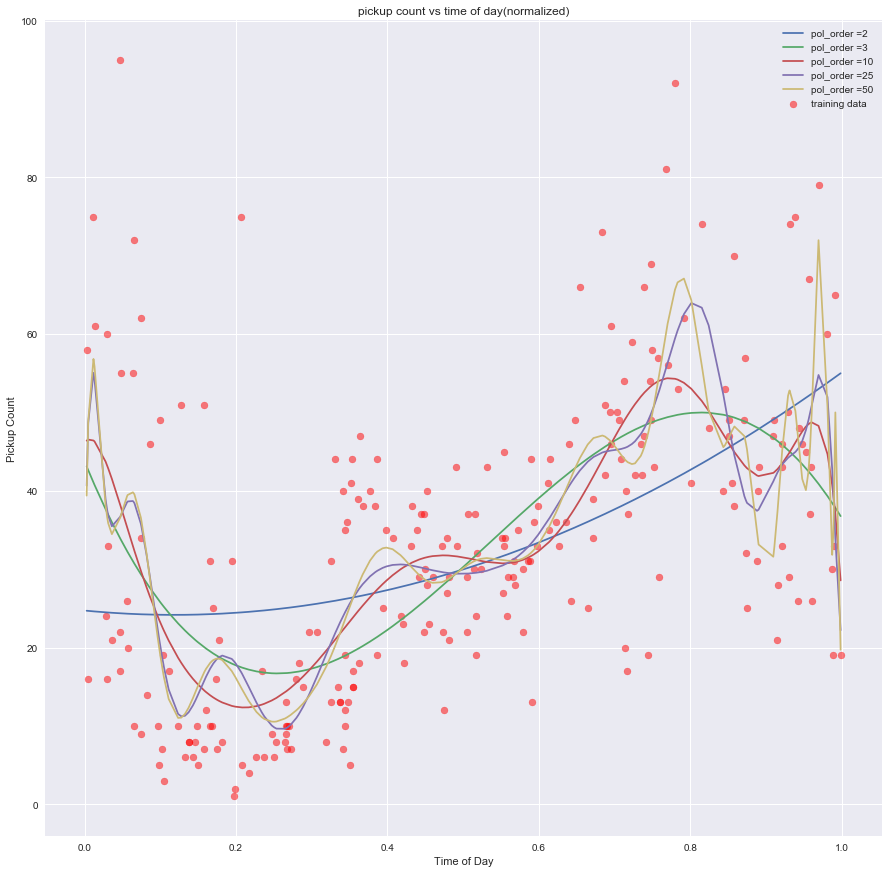

In [13]:
plt.figure(figsize = (15,15),facecolor = 'white',edgecolor = 'white')
xx = np.sort(X_train[:,0])
for i in range(len(polmodels)):
    plt.plot(xx, polresults[i], alpha=1, label='pol_order ='+ str(polorder[i]))

plt.scatter(X_train, y_train, color='red', alpha=0.5, label='training data')
plt.xlabel('Time of Day')
plt.ylabel('Pickup Count')
plt.title('pickup count vs time of day(normalized)')
plt.legend(loc='best')



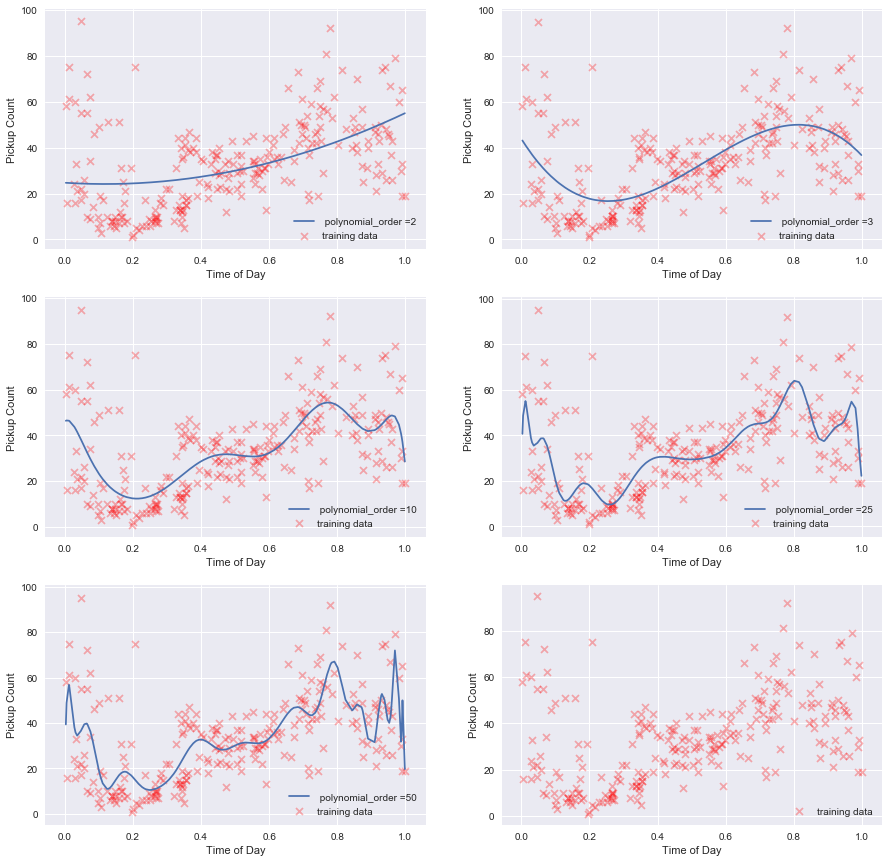

In [14]:
# for each model plot the prediction of the training data
fig, ax = plt.subplots(3,2,figsize = (15,15))
xx = np.sort(X_train[:,0])
ctr = 0
for i in range(3):
    for j in range(2):
        if ctr < 5:
            ax[i,j].plot(xx, polresults[ctr], alpha=1, label=' polynomial_order ='+ str(polorder[ctr]))
        ax[i,j].scatter(X_train, y_train, color='red', alpha=0.3, label='training data',marker = 'x')
        ax[i,j].set_xlabel('Time of Day')
        ax[i,j].set_ylabel('Pickup Count')
        ax[i,j].legend()
        ctr+=1
ax[2,1].plot
plt.legend(loc='best')




# Evaluating Models

In [15]:
rtrain = []
rtest = []

for i in range(len(polorder)):
    rtrain.append(r2_score(y_train,pol_r2_train[i]))
    rtest.append(r2_score(y_test,pol_r2_test[i]))

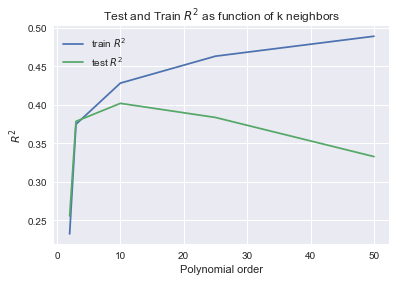

In [16]:
plt.figure()
plt.plot(polorder,rtrain,label = 'train $R^2$')
plt.plot(polorder,rtest,label = 'test $R^2$')
plt.legend()
plt.title('Test and Train $R^2$ as function of k neighbors')
plt.xlabel('Polynomial order')
plt.ylabel('$R^2$')


<font color = 'green'> From this we can see that a high training score doesn't mean a high test score. This is due to overfitting or the curse of dimensionality. We can see that the 10'th order polynomial approximates a good test score which is comparable to k-nn and better than linear regression. 

# Residuals

C:\Users\Shaan Desai\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


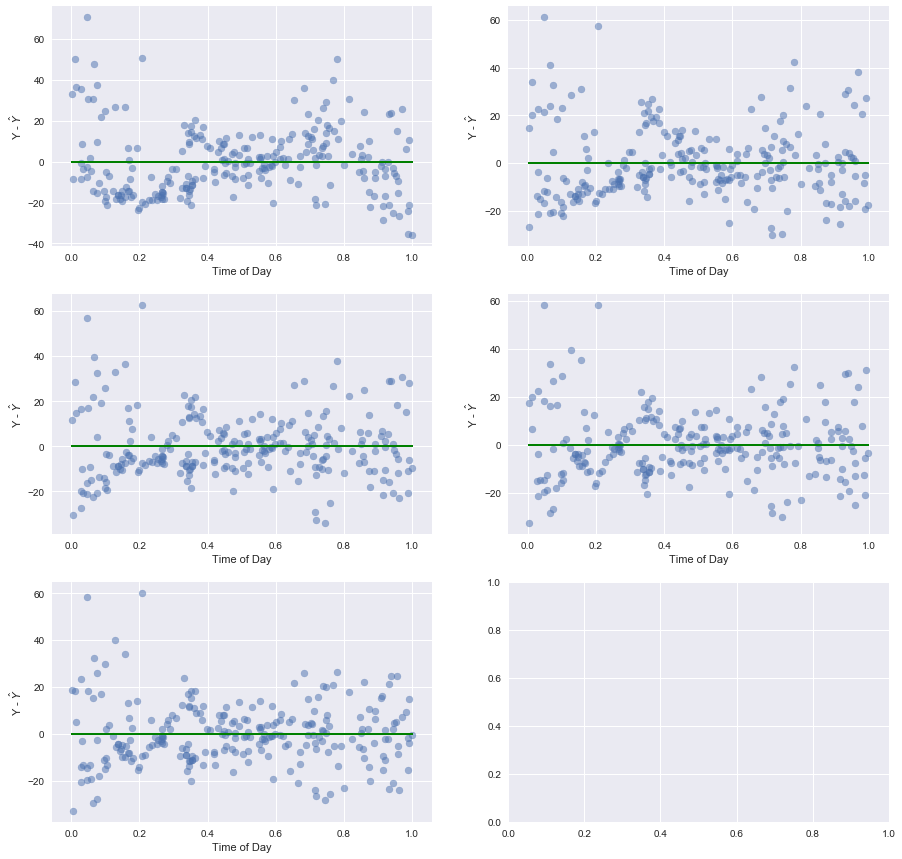

In [17]:
# for each model plot the prediction of the training data
fig, ax = plt.subplots(3,2,figsize = (15,15))
ctr = 0
for i in range(3):
    for j in range(2):
        if ctr < 5:
            ax[i,j].scatter(X_train,y_train - pol_r2_train[ctr], alpha=0.5, label=' polynomial_order ='+ str(polorder[ctr]))
            ax[i,j].plot(X_train,np.zeros(len(X_train)),color = 'green',label = 'zero residual')
            ax[i,j].set_xlabel('Time of Day')
            ax[i,j].set_ylabel('Y - $\hat{Y}$')
        #ax[i,j].legend()
        ctr+=1
        
plt.legend(loc='best')





We can see that as the polynomial order increases,the residual decreases

# Part (d): Summarize Results
In a brief paragraph (8 or fewer sentences), summarize which of the models seen above you would choose to predict the number of taxi cab pick-ups at any specific time of day.  Be sure to explain your choice. Interpret the model you choose, including which predictors are significant and provide and interpret the CIs for their coefficients (if you choose a regression model). How well does you model predict the number of taxi cab pick-ups?  How would you improve this model even further?  Feel free to refer to visual(s) above or provide a new one to make your case.



<font color ='green'> In this homework we have explored k-NN, linear regression and polynomial regression. We have found a range of models in each of these situations that are able to predict, with some accuracy, the test set. In the k-NN situation we find that when k ~ 10 we generate a test R^2 of 0.4. A similar R^2 score on the test set is achieved with a polynomial of degree 10. Both of these models can be used to solve the given problem. I would like to choose k-NN since the k-nn predictor (with k = 10) is better than the polynomial of order 10 on the right hand side of the graph. As we can see, the data is not 'negatively' correlated as the polynomial predicts. I would improve this model by finding more data to train the model. I would then create a range of models based on a granular search of k (iterate through k values) and find the k value with the best cross validation score (by iteratively splitting the training set into training and validation set). I would then use this model to test and find the best R^2 parameters.

---- 


# APCOMP209a - Homework Question

Read Sections 1 and 2 of this [paper](https://www.researchgate.net/profile/Roberto_Togneri/publication/45094554_Linear_Regression_for_Face_Recognition/links/09e4150d243bd8b987000000/Linear-Regression-for-Face-Recognition.pdf). 

Briefly, we have a number of cleaned images of people's faces. The model leverages the concept that "patterns from a single-object class lie on a linear subspace" and the fact that linear regression can be thought of as an orthogonal projection of the response vector (Y) onto the subspace spanned by the columns of the predictor matrix (X).

### Question 1
Consider a space in $\mathbb{R}^5$, with two subspaces $S_0 \subset \mathbb{R}^5$ and $S_1 \subset \mathbb{R}^5$. For simplicity, let us consider the case where the subspace $S_0$ is spanned by the vectors $v_{00} = [1,0,0,0,0]^T$, $v_{01} =[0,1,0,0,0]^T$ and the subspace $S_1$ is spanned by the vectors $v_{10} = [0,0,0,1,0]^T$ and $v_{11} = [0,0,0,0,1]^T$. 

Now let us assume that we have a dataset that consists of labeled vectors in subspaces $S_0$ and $S_1$ respectively. Our task here is to use the data in the training dataset to classify an unknown vector into either $S_0$ or $S_1$.

Let us consider the case where we construct a predictive matrix $\mathbf{X}$ from the 'training' data for which we know the labels (note: is not meant to match $S_0$ and $S_1$ above).

```
dataset = np.array([
            [1,0,0,0,0],
            [1,1,0,0,0],
            [0,0,0,1,1],
            [0,0,0,1,0],
            ])
labels = np.array([0,0,1,1])
```

(Briefly notice that the training data probably doesn't consist of vectors that are orthonormal in spanning $S_0$ or $S_1$).

And we have an unknown vector, for which we want clasify as either a noisy example of a vector in either $S_0$ or $S_1$: ```y_0 = np.array([2,10,1,0,0])```.

In [7]:
import numpy as np
# starter code
dataset = np.array([
            [1,0,0,0,0],
            [1,1,0,0,0],
            [0,0,0,1,1],
            [0,0,0,1,0],
            ])
labels = np.array([0,0,1,1])
y_0 = np.array([2,10,1,0,0])


#### Question 1a
Recall the solution for the Least Squares problem and the 'hat' matrix $\mathbf{H}$. Consider the case when $Y$ lies in the same subspace as the columns of $\mathbf{X}$. In this case, how accurate should the prediction of $\hat{Y}$ be?

#### Question 1b
Given the projection of $Y$ onto the space spanned by the columns of the X matrix. We can analyse the significance of the different predictor vectors (i.e. the building blocks that are used to reconstrct the $\hat{Y}$ vector). Discuss how this may help one when analysing a classification decision by the model.

#### Question 1c
As discussed in the linked paper, we have data that has vectors that are classified into one subspace or another (our training dataset). We can use the projection interpretation of linear regression to make a classification decision of a new (unseen) vector into either $S_0$ or $S_1$. In other words, construct X matrices from the known vectors, and project the unknown vector onto the subspaces spanned by the various X matrices using the "hat" interpretation of linear regression. To do classification, we can calculate the minimum euclidean distance ($L_2$ norm) between the original vector and the projection. Use this method to classify ```y_0``` as belonging to either $S_0$ or $S_1$.

**Feel free to run this same example on the face data presented in the paper - you will be doing this for next week's homework regardless**

#### Question 1d (unrelated to the parts above)

Explicitly derive the relationship between the F-statistic (from the usual F test) and the $R^2$ measure in multiple linear regression (i.e. write the F-statistic of a multiple linear regression model in terms of the $R^2$ of the same model).

# Answers

<font color = 'green'> 1 a) If the vectors of X can span the entire Y space then our prediction of $\hat{Y}$ should be fully accurate since we can span every vector in the subspace of Y.

<font color = 'green'> 1 b) A great way to analyze classification is the vector norm. Essentially if we find the vector norm of the vector Y and its projection onto the subspace spanned by $X_i$ then we can determine whether the vector is 'closer' to $S_0$ or $S_1$. 


<font color = 'green'> 1 c) I implemented a function below called classifier that can take a vector in R^5, project it onto S_0 and S_1 and determine the euclidean norm between the two and determine which is closer and hence classify the vector as being in one subspace or the other

In [9]:
def classifier(y):
    Y = y
    X1 = np.array([[1,0,0,0,0],[0,1,0,0,0]]).T
    X2 = np.array([[0,0,0,1,0],[0,0,0,0,1]]).T
    yhat1 = np.dot(np.dot(X1,np.linalg.inv(np.dot(X1.T,X1))),np.dot(X1.T,Y))
    yhat2 = np.dot(np.dot(X2,np.linalg.inv(np.dot(X2.T,X2))),np.dot(X2.T,Y))
    if (np.linalg.norm(yhat1 - Y)) <  (np.linalg.norm(yhat2 - Y)):
        print('S_0')
    else:
        print('S_1')
        

In [10]:
for i in range(np.shape(dataset)[0]):
    classifier(dataset[i,:].T)

S_0
S_0
S_1
S_1


<font color = 'green'> In the example above we iterate over 'dataset' and find that we are able to obtain the labels as they were originally stated

Now let us try y_0 = [2,10,1,0,0]

In [11]:
classifier(np.array([2,10,1,0,0]).T)

S_0


We find that it is closer to S_0 so we classify it as being in S_0 and this makes intuitive sense since the first three terms in the vector are non zero while the last two are zero

<font color ='green'> 


$$ f = \frac{(TSS-RSS)/p}{RSS(n-p-1)} $$

We know that:
    
$$ R^2 = \frac{TSS-RSS}{TSS} $$

Therefore:
    
$$ TSS = \frac{RSS}{1-R^2} $$

using this and plugging it into f gives:
    
$$ f = \frac{(\frac{1}{1-R^2} - 1)/p}{1/(n-p-1)} $$

$$ f = \frac{(\frac{R^2}{1-R^2})/p}{1/(n-p-1)} $$